In [1]:
"""In the FIFA 21 Project we will try to predict a player's "Overall Rating" by analysing data from the following dataset: fifa21_train.csv
It can be found in the GDrive.

The database is an extract from https://sofifa.com/

Explanations of the acronyms and abbreviations can be found here and here"""

'In the FIFA 21 Project we will try to predict a player\'s "Overall Rating" by analysing data from the following dataset: fifa21_train.csv\nIt can be found in the GDrive.\n\nThe database is an extract from https://sofifa.com/\n\nExplanations of the acronyms and abbreviations can be found here and here'

In [2]:
import pandas as pd
import numpy as np

In [3]:
# opening the data file
df = pd.read_csv('fifa21_train.csv')
df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [4]:
#Checking for the full column contents
column_names = df.columns.tolist()
column_names

['ID',
 'Name',
 'Age',
 'Nationality',
 'Club',
 'BP',
 'Position',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM'

In [5]:
# Making a copy of the original file
fifa_df = df.copy()
fifa_df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [6]:
#columns_to_retain = [
    #'BP', 'Position',
    #'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Composure',
     #'Defending','Goalkeeping', 'OVA','LS', 'ST', 'RS', 'LW', 'LF', 'CF',
     #'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
     #'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK','OVA']

columns_to_retain = [
    'BP','Attacking','Crossing','Short Passing','Skill','Ball Control','FK Accuracy','Movement','Sprint Speed',
    'Power','Shot Power', 'Strength', 'Mentality','Composure','Vision','Defending','Standing Tackle','Sliding Tackle','Goalkeeping',
    'GK Reflexes','GK Handling','OVA']

        
# Get the dataframe filtered:
fifa_df_filtered = fifa_df[columns_to_retain]
fifa_df_filtered

,BP,Attacking,Crossing,Short Passing,Skill,Ball Control,FK Accuracy,Movement,Sprint Speed,Power,...,Mentality,Composure,Vision,Defending,Standing Tackle,Sliding Tackle,Goalkeeping,GK Reflexes,GK Handling,OVA
0,CM,258,54,70,286,63,55,346,73,306,...,290,54.0,68.0,148,56,43.0,48,6,12,64
1,ST,365,66,68,375,79,72,404,83,372,...,313,70.0,72.0,77,20,22.0,55,16,7,77
2,CAM,336,73,78,424,85,91,424,76,308,...,332,82.0,78.0,80,29,28.0,21,3,3,80
3,CDM,242,44,62,259,61,46,282,59,277,...,257,48.0,54.0,168,58,55.0,42,12,9,59
4,CDM,249,49,68,280,66,45,324,66,280,...,294,58.0,64.0,185,61,66.0,52,15,9,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,62,59,248,59,29,333,73,273,...,266,46.0,54.0,184,64,61.0,61,14,14,65
11697,GK,84,12,29,96,18,19,237,40,217,...,101,56.0,15.0,41,16,13.0,347,72,67,70
11698,RM,286,64,64,291,67,38,388,76,278,...,241,58.0,58.0,62,12,13.0,57,16,10,67
11699,CM,254,64,73,284,75,63,198,72,258,...,241,NaN,NaN,113,58,NaN,81,24,24,68


In [7]:
# Check for duplicate values
check_duplicates = fifa_df_filtered.duplicated()
check_duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
11696    False
11697    False
11698    False
11699    False
11700    False
Length: 11701, dtype: bool

In [8]:
# How many duplicate values
num_duplicates = check_duplicates.sum()
num_duplicates

0

In [9]:
#Renaming the columns
column_rename = {'BP': 'Best Position','OVA':'overall value'}
fifa_df_filtered = fifa_df_filtered.rename(columns=column_rename)
fifa_df_filtered

,Best Position,Attacking,Crossing,Short Passing,Skill,Ball Control,FK Accuracy,Movement,Sprint Speed,Power,...,Mentality,Composure,Vision,Defending,Standing Tackle,Sliding Tackle,Goalkeeping,GK Reflexes,GK Handling,overall value
0,CM,258,54,70,286,63,55,346,73,306,...,290,54.0,68.0,148,56,43.0,48,6,12,64
1,ST,365,66,68,375,79,72,404,83,372,...,313,70.0,72.0,77,20,22.0,55,16,7,77
2,CAM,336,73,78,424,85,91,424,76,308,...,332,82.0,78.0,80,29,28.0,21,3,3,80
3,CDM,242,44,62,259,61,46,282,59,277,...,257,48.0,54.0,168,58,55.0,42,12,9,59
4,CDM,249,49,68,280,66,45,324,66,280,...,294,58.0,64.0,185,61,66.0,52,15,9,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,62,59,248,59,29,333,73,273,...,266,46.0,54.0,184,64,61.0,61,14,14,65
11697,GK,84,12,29,96,18,19,237,40,217,...,101,56.0,15.0,41,16,13.0,347,72,67,70
11698,RM,286,64,64,291,67,38,388,76,278,...,241,58.0,58.0,62,12,13.0,57,16,10,67
11699,CM,254,64,73,284,75,63,198,72,258,...,241,NaN,NaN,113,58,NaN,81,24,24,68


In [10]:
# Replacing white spaces for '_' and get all column titles in lowercase
cols = []
for i in range(len(fifa_df_filtered.columns)):
    cols.append(fifa_df_filtered.columns[i].lower().replace(' ', '_'))
fifa_df_filtered.columns = cols
fifa_df_filtered

,best_position,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,...,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value
0,CM,258,54,70,286,63,55,346,73,306,...,290,54.0,68.0,148,56,43.0,48,6,12,64
1,ST,365,66,68,375,79,72,404,83,372,...,313,70.0,72.0,77,20,22.0,55,16,7,77
2,CAM,336,73,78,424,85,91,424,76,308,...,332,82.0,78.0,80,29,28.0,21,3,3,80
3,CDM,242,44,62,259,61,46,282,59,277,...,257,48.0,54.0,168,58,55.0,42,12,9,59
4,CDM,249,49,68,280,66,45,324,66,280,...,294,58.0,64.0,185,61,66.0,52,15,9,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,62,59,248,59,29,333,73,273,...,266,46.0,54.0,184,64,61.0,61,14,14,65
11697,GK,84,12,29,96,18,19,237,40,217,...,101,56.0,15.0,41,16,13.0,347,72,67,70
11698,RM,286,64,64,291,67,38,388,76,278,...,241,58.0,58.0,62,12,13.0,57,16,10,67
11699,CM,254,64,73,284,75,63,198,72,258,...,241,NaN,NaN,113,58,NaN,81,24,24,68


In [11]:
#def convert_position_rating(value):
    # If it is a full number, it remains as it is
    #if isinstance(value, int):
        #return value
    
    # If the value contains '+', we split it and add it
    #if '+' in value:
       # base, added = value.split('+')
        #return int(base) + int(added)
    # If there is no '+', we just convert the value to a full number
    #else:
        #return int(value)

# Columns to apply it
#columns_to_process = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       #'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       #'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','gk']

# Applying the function to each column
#for col in columns_to_process:
    #fifa_df_filtered[col] = fifa_df_filtered[col].apply(convert_position_rating)
    

In [12]:
#Check null values
fifa_df_filtered.isna().sum()

best_position        0
attacking            0
crossing             0
short_passing        0
skill                0
ball_control         0
fk_accuracy          0
movement             0
sprint_speed         0
power                0
shot_power           0
strength             0
mentality            0
composure          279
vision              41
defending            0
standing_tackle      0
sliding_tackle      41
goalkeeping          0
gk_reflexes          0
gk_handling          0
overall_value        0
dtype: int64

In [13]:
# Separating numerical data and categorical data
cat_df = fifa_df_filtered.select_dtypes(include= 'object')
num_df = fifa_df_filtered.select_dtypes(include= np.number)


In [14]:
#Applying median for numerical and mode for categorical values to replace null values
for col in fifa_df_filtered.columns:
        if fifa_df_filtered[col].dtype == 'object':
            fifa_df_filtered[col].fillna(fifa_df_filtered[col].mode()[0], inplace=True)
        else:
            fifa_df_filtered[col].fillna(fifa_df_filtered[col].median(), inplace=True)

In [15]:
# Checking the replacement of the null values
null_counts = fifa_df_filtered.isnull().sum()
null_counts.sum()


0

In [16]:
# Checking the statistics
fifa_df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
crossing,11701.0,51.593795,17.872747,6.0,41.0,56.0,65.0,94.0
short_passing,11701.0,60.436800,13.971811,8.0,56.0,63.0,69.0,94.0
skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0
ball_control,11701.0,60.627810,15.886688,5.0,57.0,64.0,70.0,96.0
fk_accuracy,11701.0,44.358260,17.484142,5.0,32.0,43.0,58.0,94.0
movement,11701.0,322.617383,55.330054,113.0,294.0,331.0,361.0,464.0
sprint_speed,11701.0,65.446628,14.516404,11.0,59.0,68.0,75.0,96.0
power,11701.0,302.083326,49.697749,133.0,271.0,308.0,339.0,444.0
shot_power,11701.0,59.726348,13.511767,12.0,50.0,61.0,70.0,95.0


In [17]:
# Plotting the numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

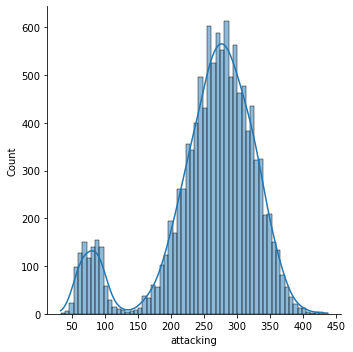

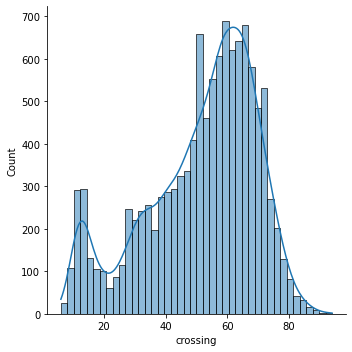

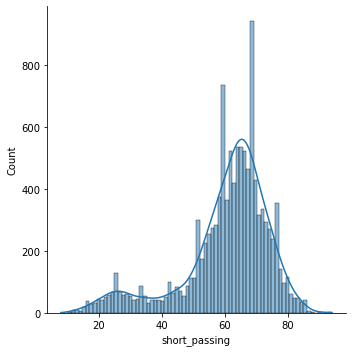

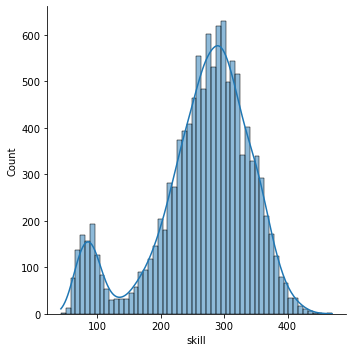

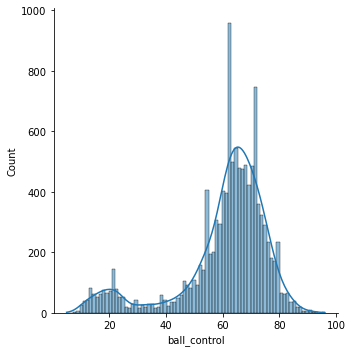

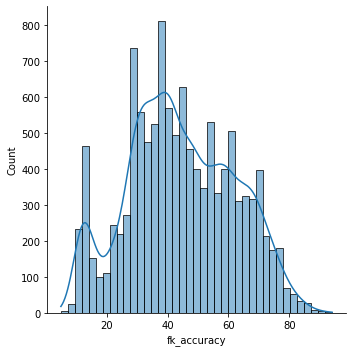

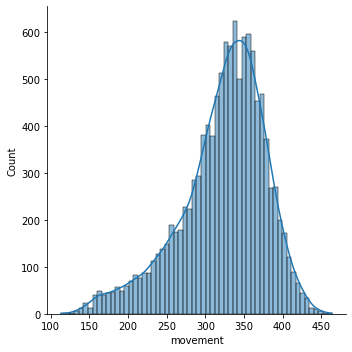

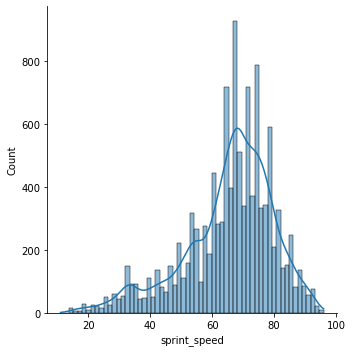

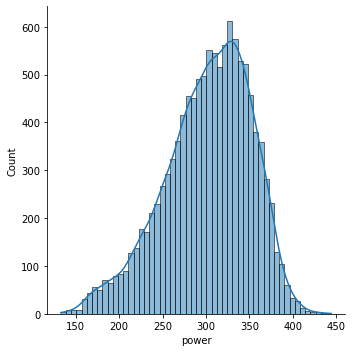

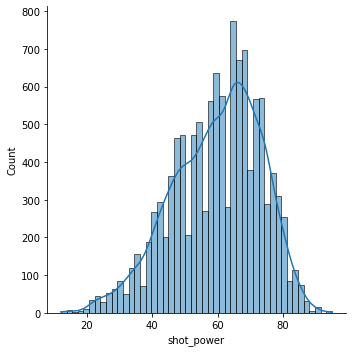

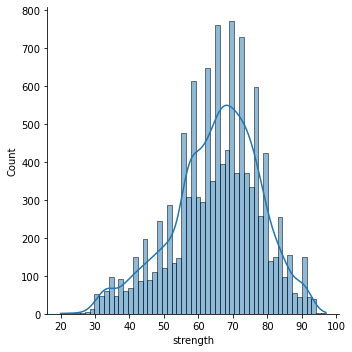

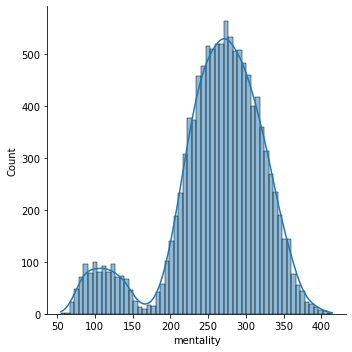

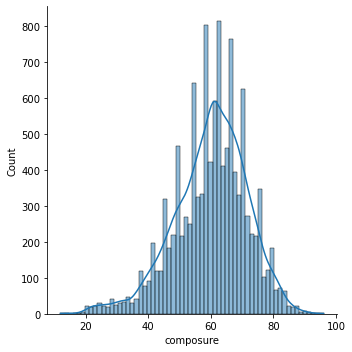

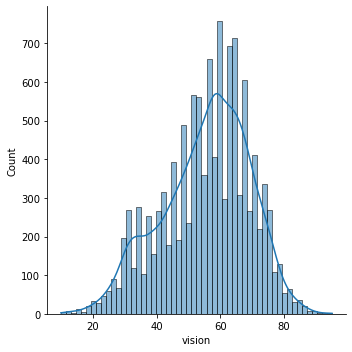

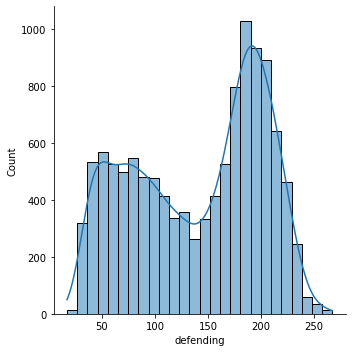

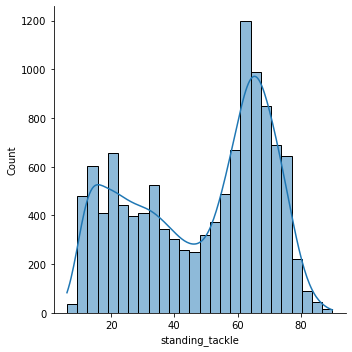

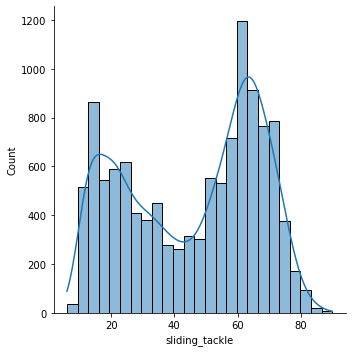

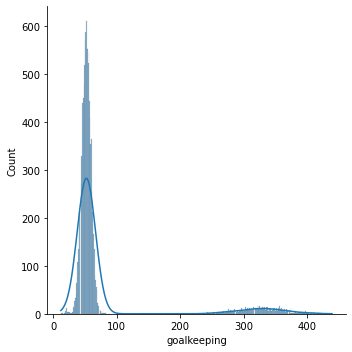

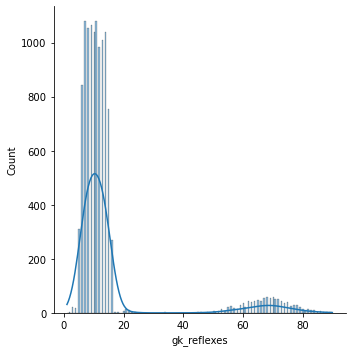

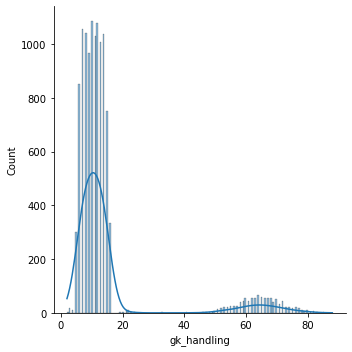

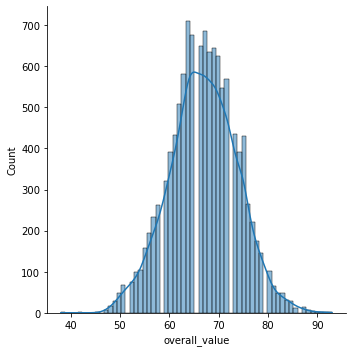

In [18]:
for column in num_df:
    sns.displot(num_df[column],kde=True)
    plt.show()

In [19]:
# Overall value shows a normalized shapped bell

In [20]:
# Getting correlations descritpion
correlations = num_df.corr()
correlations

,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,...,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value
attacking,1.000000,0.842204,0.880607,0.928584,0.935176,0.778454,0.692493,0.588027,0.823527,0.710530,...,0.888604,0.708078,0.719621,0.311367,0.307418,0.267624,-0.769826,-0.762198,-0.760690,0.433092
crossing,0.842204,1.000000,0.800162,0.883624,0.834774,0.751382,0.722357,0.601544,0.628841,0.533293,...,0.797638,0.591308,0.682835,0.409057,0.404626,0.384259,-0.654928,-0.649351,-0.644804,0.390354
short_passing,0.880607,0.800162,1.000000,0.901442,0.913722,0.719229,0.626112,0.496319,0.737152,0.585329,...,0.888732,0.717110,0.708070,0.534991,0.531136,0.495065,-0.725601,-0.719149,-0.715735,0.493152
skill,0.928584,0.883624,0.901442,1.000000,0.940600,0.890196,0.725776,0.572309,0.753061,0.687718,...,0.885893,0.711251,0.792546,0.370432,0.367142,0.332576,-0.716263,-0.710394,-0.707305,0.442666
ball_control,0.935176,0.834774,0.913722,0.940600,1.000000,0.746248,0.722666,0.612188,0.758331,0.625837,...,0.881042,0.701703,0.712191,0.394399,0.391198,0.355042,-0.791503,-0.783339,-0.780596,0.432469
fk_accuracy,0.778454,0.751382,0.719229,0.890196,0.746248,1.000000,0.559727,0.405067,0.634064,0.662166,...,0.737023,0.599250,0.715833,0.232448,0.236422,0.203004,-0.534936,-0.529288,-0.527341,0.372304
movement,0.692493,0.722357,0.626112,0.725776,0.722666,0.559727,1.000000,0.885792,0.560489,0.435952,...,0.610661,0.474834,0.570077,0.174070,0.159572,0.145356,-0.563037,-0.559482,-0.559817,0.304496
sprint_speed,0.588027,0.601544,0.496319,0.572309,0.612188,0.405067,0.885792,1.000000,0.483477,0.319910,...,0.479805,0.317768,0.378571,0.132882,0.125240,0.120231,-0.570812,-0.563251,-0.563717,0.157643
power,0.823527,0.628841,0.737152,0.753061,0.758331,0.634064,0.560489,0.483477,1.000000,0.765745,...,0.823428,0.698385,0.604000,0.361816,0.351607,0.310745,-0.573683,-0.569487,-0.569926,0.547839
shot_power,0.710530,0.533293,0.585329,0.687718,0.625837,0.662166,0.435952,0.319910,0.765745,1.000000,...,0.622030,0.618164,0.674548,0.015076,0.014595,-0.020406,-0.299718,-0.296081,-0.298355,0.539288


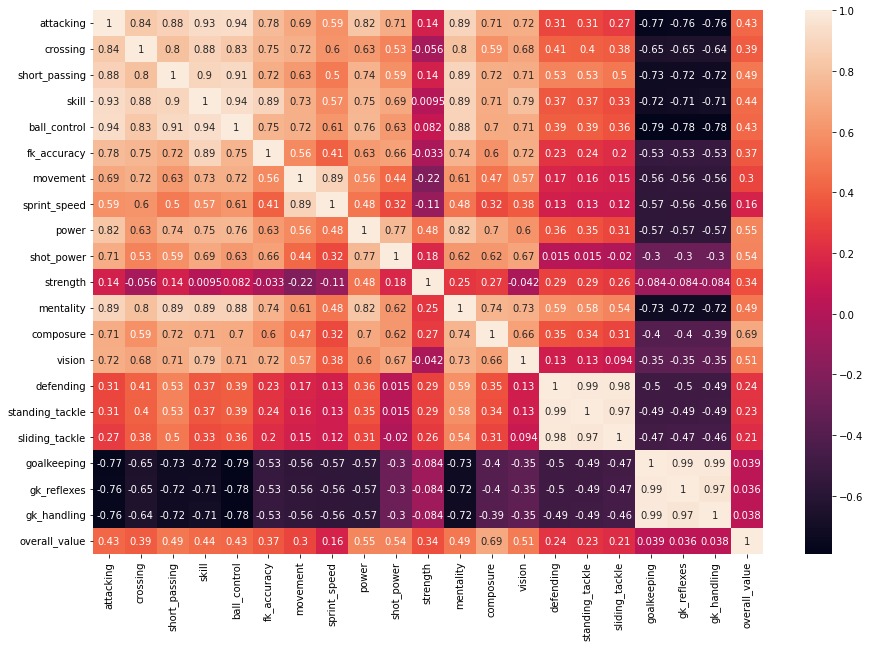

In [21]:
# Getting the correlations map
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [22]:
# There seems to be some Mulicolliniarity regarding some features

In [23]:
fifa_new = fifa_df_filtered
fifa_new

,best_position,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,...,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value
0,CM,258,54,70,286,63,55,346,73,306,...,290,54.0,68.0,148,56,43.0,48,6,12,64
1,ST,365,66,68,375,79,72,404,83,372,...,313,70.0,72.0,77,20,22.0,55,16,7,77
2,CAM,336,73,78,424,85,91,424,76,308,...,332,82.0,78.0,80,29,28.0,21,3,3,80
3,CDM,242,44,62,259,61,46,282,59,277,...,257,48.0,54.0,168,58,55.0,42,12,9,59
4,CDM,249,49,68,280,66,45,324,66,280,...,294,58.0,64.0,185,61,66.0,52,15,9,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,62,59,248,59,29,333,73,273,...,266,46.0,54.0,184,64,61.0,61,14,14,65
11697,GK,84,12,29,96,18,19,237,40,217,...,101,56.0,15.0,41,16,13.0,347,72,67,70
11698,RM,286,64,64,291,67,38,388,76,278,...,241,58.0,58.0,62,12,13.0,57,16,10,67
11699,CM,254,64,73,284,75,63,198,72,258,...,241,61.0,57.0,113,58,52.0,81,24,24,68


In [24]:
# X,y split and target definition

X=fifa_new.drop('overall_value', axis=1)     
y=fifa_new['overall_value']


In [25]:
# Categorical and numerical split of X
X_cat = X.select_dtypes(include= 'object')
X_num = X.select_dtypes(include= np.number)

In [26]:
X_num

,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,strength,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling
0,258,54,70,286,63,55,346,73,306,62,55,290,54.0,68.0,148,56,43.0,48,6,12
1,365,66,68,375,79,72,404,83,372,74,74,313,70.0,72.0,77,20,22.0,55,16,7
2,336,73,78,424,85,91,424,76,308,79,42,332,82.0,78.0,80,29,28.0,21,3,3
3,242,44,62,259,61,46,282,59,277,57,58,257,48.0,54.0,168,58,55.0,42,12,9
4,249,49,68,280,66,45,324,66,280,61,61,294,58.0,64.0,185,61,66.0,52,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,224,62,59,248,59,29,333,73,273,31,68,266,46.0,54.0,184,64,61.0,61,14,14
11697,84,12,29,96,18,19,237,40,217,50,64,101,56.0,15.0,41,16,13.0,347,72,67
11698,286,64,64,291,67,38,388,76,278,61,37,241,58.0,58.0,62,12,13.0,57,16,10
11699,254,64,73,284,75,63,198,72,258,61,64,241,61.0,57.0,113,58,52.0,81,24,24


In [27]:
#Getting the stats
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
crossing,11701.0,51.593795,17.872747,6.0,41.0,56.0,65.0,94.0
short_passing,11701.0,60.436800,13.971811,8.0,56.0,63.0,69.0,94.0
skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0
ball_control,11701.0,60.627810,15.886688,5.0,57.0,64.0,70.0,96.0
fk_accuracy,11701.0,44.358260,17.484142,5.0,32.0,43.0,58.0,94.0
movement,11701.0,322.617383,55.330054,113.0,294.0,331.0,361.0,464.0
sprint_speed,11701.0,65.446628,14.516404,11.0,59.0,68.0,75.0,96.0
power,11701.0,302.083326,49.697749,133.0,271.0,308.0,339.0,444.0
shot_power,11701.0,59.726348,13.511767,12.0,50.0,61.0,70.0,95.0


In [28]:
# importing the library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
#Scalling using MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(11701, 20)


,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,strength,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling
0,0.556931,0.545455,0.720930,0.569087,0.637363,0.561798,0.663818,0.729412,0.556270,0.602410,0.454545,0.654596,0.500000,0.682353,0.524,0.595238,0.440476,0.084309,0.056180,0.116279
1,0.821782,0.681818,0.697674,0.777518,0.813187,0.752809,0.829060,0.847059,0.768489,0.746988,0.701299,0.718663,0.690476,0.729412,0.240,0.166667,0.190476,0.100703,0.168539,0.058140
2,0.750000,0.761364,0.813953,0.892272,0.879121,0.966292,0.886040,0.764706,0.562701,0.807229,0.285714,0.771588,0.833333,0.800000,0.252,0.273810,0.261905,0.021077,0.022472,0.011628
3,0.517327,0.431818,0.627907,0.505855,0.615385,0.460674,0.481481,0.564706,0.463023,0.542169,0.493506,0.562674,0.428571,0.517647,0.604,0.619048,0.583333,0.070258,0.123596,0.081395
4,0.534653,0.488636,0.697674,0.555035,0.670330,0.449438,0.601140,0.647059,0.472669,0.590361,0.532468,0.665738,0.547619,0.635294,0.672,0.654762,0.714286,0.093677,0.157303,0.081395


In [30]:
# One hot encoded
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)
X_cat_encode.head()

,best_position_CB,best_position_CDM,best_position_CF,best_position_CM,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# concat numerical and categorical transformations for features
X=pd.concat([X_num_scale, X_cat_encode], axis=1) 
X.describe()

,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,...,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
count,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,...,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,0.558124,0.518111,0.609730,0.523413,0.611295,0.442228,0.597201,0.640549,0.543676,0.575016,...,0.092385,0.054098,0.047774,0.012648,0.014700,0.053842,0.082984,0.019486,0.014187,0.158790
std,0.178879,0.203099,0.162463,0.179942,0.174579,0.196451,0.157635,0.170781,0.159800,0.162792,...,0.289581,0.226221,0.213296,0.111757,0.120353,0.225714,0.275870,0.138230,0.118266,0.365496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.492574,0.397727,0.558140,0.442623,0.571429,0.303371,0.515670,0.564706,0.443730,0.457831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.589109,0.568182,0.639535,0.552693,0.648352,0.426966,0.621083,0.670588,0.562701,0.590361,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.675743,0.670455,0.709302,0.646370,0.714286,0.595506,0.706553,0.752941,0.662379,0.698795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10530, 34)
(1171, 34)
(10530,)
(1171,)


In [35]:
X_train.head()

,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,...,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
4398,0.670792,0.670455,0.686047,0.655738,0.659341,0.617978,0.504274,0.447059,0.562701,0.674699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10708,0.445545,0.409091,0.581395,0.444965,0.560440,0.325843,0.464387,0.623529,0.385852,0.397590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11404,0.492574,0.568182,0.651163,0.594848,0.648352,0.561798,0.649573,0.635294,0.540193,0.554217,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7978,0.601485,0.375000,0.511628,0.435597,0.593407,0.393258,0.541311,0.611765,0.591640,0.650602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11538,0.539604,0.397727,0.709302,0.501171,0.659341,0.303371,0.507123,0.447059,0.517685,0.433735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Train and run model
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

In [37]:
# Model Validation

In [38]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.8392887868947992 -- test R2: 0.8347111478788564


In [39]:
# MSE
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 7.632487211929863 -- test MSE: 7.489946456379216


In [40]:
# RMSE
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 2.762695642290309 -- test RMSE: 2.7367766544567016


In [41]:
    #MAE
    from sklearn.metrics import mean_absolute_error as mae

    train_mae=mae(lm.predict(X_train), y_train)
    test_mae=mae(y_pred, y_test)

    print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 2.1159679171548977 -- test MAE: 2.112584762943383


In [42]:
# If we increase the sample of data from 0.20 to 0.35 or decrease the sample from 0.20 for 0.10, the r2 score lowers from 
#0,84 to 0,83, which is not very significant in terms of efectiveness proof of the prediction model.

# BONUS

Try to create a new function called preprocess which"

takes a dataframe as input
call all the other group member functions and apply them to the starting dataframe
return a clean dataframe.

In [43]:
    # Your code here
    def clean_fifa(fifa_new):
        n_cols = ['BP','Attacking','Crossing','Short Passing','Skill','Ball Control','FK Accuracy','Movement','Sprint Speed',
    'Power','Shot Power', 'Strength', 'Mentality','Composure','Vision','Defending','Standing Tackle','Sliding Tackle','Goalkeeping',
    'GK Reflexes','GK Handling','OVA']
        for i in range(len(fifa_new.columns)):
            n_cols.append(fifa_new.columns[i].lower().replace(' ', '_'))
        fifa_new.columns = n_cols
        fifa_new = df.rename(columns={'BP': 'Best Position', 'OVA':'overall value'})
        #Check null values
        fifa_new = df.drop_duplicates()
        #Check null values
        fifa_new = fifa_df_filtered.isna().sum()
        cat_df = fifa_new.select_dtypes(include= 'object')
        num_df = fifa_new.select_dtypes(include= np.number)
        for col in df.columns:
            if fifa_new[col].dtype == 'object':
                fifa_new[col].fillna(fifa_new[col].mode()[0], inplace=True)
            else:
                fifa_new[col].fillna(fifa_new[col].median(), inplace=True)
    fifa_new          

,best_position,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,...,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value
0,CM,258,54,70,286,63,55,346,73,306,...,290,54.0,68.0,148,56,43.0,48,6,12,64
1,ST,365,66,68,375,79,72,404,83,372,...,313,70.0,72.0,77,20,22.0,55,16,7,77
2,CAM,336,73,78,424,85,91,424,76,308,...,332,82.0,78.0,80,29,28.0,21,3,3,80
3,CDM,242,44,62,259,61,46,282,59,277,...,257,48.0,54.0,168,58,55.0,42,12,9,59
4,CDM,249,49,68,280,66,45,324,66,280,...,294,58.0,64.0,185,61,66.0,52,15,9,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,62,59,248,59,29,333,73,273,...,266,46.0,54.0,184,64,61.0,61,14,14,65
11697,GK,84,12,29,96,18,19,237,40,217,...,101,56.0,15.0,41,16,13.0,347,72,67,70
11698,RM,286,64,64,291,67,38,388,76,278,...,241,58.0,58.0,62,12,13.0,57,16,10,67
11699,CM,254,64,73,284,75,63,198,72,258,...,241,61.0,57.0,113,58,52.0,81,24,24,68


# FIFA MODEL VALIDATION

In [44]:
""""@canal It’s TIME!!!  The Validation Set is in the Google Drive!!  
Remember the process!!  
You are receiving new and unseen data to test the model you created.  
The actual target column OVA is included in the data.  
First do the X,y split.  
Then clean, scale, and encode the X exactly like you did the training set. 
Make sure all of the columns are the same in the same order.  
Re-use the scaler, encoder, and model that has already been trained. 
You should submit your RMSE metric by 12:30.  
We will ask the group with the best score to share their process with the whole group."""

'"@canal It’s TIME!!!  The Validation Set is in the Google Drive!!  \nRemember the process!!  \nYou are receiving new and unseen data to test the model you created.  \nThe actual target column OVA is included in the data.  \nFirst do the X,y split.  \nThen clean, scale, and encode the X exactly like you did the training set. \nMake sure all of the columns are the same in the same order.  \nRe-use the scaler, encoder, and model that has already been trained. \nYou should submit your RMSE metric by 12:30.  \nWe will ask the group with the best score to share their process with the whole group.'

In [45]:
import pandas as pd
import numpy as np

In [46]:
fifa_validation = pd.read_csv('fifa21_validate.csv')
fifa_validation

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,...,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,...,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,...,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,...,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,...,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",143lbs,...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
1995,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",176lbs,...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
1996,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",146lbs,...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
1997,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",176lbs,...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [47]:
columns_to_retain = [
    'BP','Attacking','Crossing','Short Passing','Skill','Ball Control','FK Accuracy','Movement','Sprint Speed',
    'Power','Shot Power', 'Strength', 'Mentality','Composure','Vision','Defending','Standing Tackle','Sliding Tackle','Goalkeeping',
    'GK Reflexes','GK Handling','OVA']

        
# Now you can use this list to filter your dataframe:
fifa_val_filtered = fifa_validation[columns_to_retain]
fifa_val_filtered

,BP,Attacking,Crossing,Short Passing,Skill,Ball Control,FK Accuracy,Movement,Sprint Speed,Power,...,Mentality,Composure,Vision,Defending,Standing Tackle,Sliding Tackle,Goalkeeping,GK Reflexes,GK Handling,OVA
0,CB,230,47,60,228,54,36,303,68,288,...,246,49.0,39.0,200,67,65.0,56,9,8,67
1,CAM,298,62,62,330,70,56,375,72,323,...,286,65.0,64.0,61,23,19.0,53,8,13,68
2,GK,48,7,21,52,10,8,165,25,171,...,76,31.0,26.0,27,9,10.0,269,55,52,54
3,CDM,215,38,59,224,54,38,275,58,242,...,230,59.0,40.0,159,52,54.0,36,6,5,55
4,CDM,295,57,78,327,74,51,320,66,337,...,314,63.0,62.0,211,68,71.0,60,13,7,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,LB,197,59,51,207,56,29,344,78,245,...,232,59.0,34.0,167,57,58.0,51,13,15,60
1995,GK,77,13,34,70,13,10,192,30,177,...,88,33.0,36.0,36,11,11.0,288,62,55,59
1996,RM,332,76,79,373,78,65,351,65,329,...,306,75.0,81.0,118,43,39.0,58,6,15,76
1997,CDM,268,58,62,261,61,37,288,52,300,...,297,60.0,56.0,182,62,59.0,43,8,7,63


In [48]:
check_duplicates = fifa_val_filtered.duplicated()
check_duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1994    False
1995    False
1996    False
1997    False
1998    False
Length: 1999, dtype: bool

In [49]:
num_duplicates = check_duplicates.sum()
num_duplicates

0

In [50]:
column_rename = {'BP': 'Best Position','OVA':'overall value'}
fifa_val_filtered = fifa_val_filtered.rename(columns=column_rename)
fifa_val_filtered

,Best Position,Attacking,Crossing,Short Passing,Skill,Ball Control,FK Accuracy,Movement,Sprint Speed,Power,...,Mentality,Composure,Vision,Defending,Standing Tackle,Sliding Tackle,Goalkeeping,GK Reflexes,GK Handling,overall value
0,CB,230,47,60,228,54,36,303,68,288,...,246,49.0,39.0,200,67,65.0,56,9,8,67
1,CAM,298,62,62,330,70,56,375,72,323,...,286,65.0,64.0,61,23,19.0,53,8,13,68
2,GK,48,7,21,52,10,8,165,25,171,...,76,31.0,26.0,27,9,10.0,269,55,52,54
3,CDM,215,38,59,224,54,38,275,58,242,...,230,59.0,40.0,159,52,54.0,36,6,5,55
4,CDM,295,57,78,327,74,51,320,66,337,...,314,63.0,62.0,211,68,71.0,60,13,7,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,LB,197,59,51,207,56,29,344,78,245,...,232,59.0,34.0,167,57,58.0,51,13,15,60
1995,GK,77,13,34,70,13,10,192,30,177,...,88,33.0,36.0,36,11,11.0,288,62,55,59
1996,RM,332,76,79,373,78,65,351,65,329,...,306,75.0,81.0,118,43,39.0,58,6,15,76
1997,CDM,268,58,62,261,61,37,288,52,300,...,297,60.0,56.0,182,62,59.0,43,8,7,63


In [51]:
cols = []
for i in range(len(fifa_val_filtered.columns)):
    cols.append(fifa_val_filtered.columns[i].lower().replace(' ', '_'))
fifa_val_filtered.columns = cols
fifa_val_filtered

,best_position,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,...,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value
0,CB,230,47,60,228,54,36,303,68,288,...,246,49.0,39.0,200,67,65.0,56,9,8,67
1,CAM,298,62,62,330,70,56,375,72,323,...,286,65.0,64.0,61,23,19.0,53,8,13,68
2,GK,48,7,21,52,10,8,165,25,171,...,76,31.0,26.0,27,9,10.0,269,55,52,54
3,CDM,215,38,59,224,54,38,275,58,242,...,230,59.0,40.0,159,52,54.0,36,6,5,55
4,CDM,295,57,78,327,74,51,320,66,337,...,314,63.0,62.0,211,68,71.0,60,13,7,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,LB,197,59,51,207,56,29,344,78,245,...,232,59.0,34.0,167,57,58.0,51,13,15,60
1995,GK,77,13,34,70,13,10,192,30,177,...,88,33.0,36.0,36,11,11.0,288,62,55,59
1996,RM,332,76,79,373,78,65,351,65,329,...,306,75.0,81.0,118,43,39.0,58,6,15,76
1997,CDM,268,58,62,261,61,37,288,52,300,...,297,60.0,56.0,182,62,59.0,43,8,7,63


In [52]:
fifa_val_filtered.isna().sum()

best_position       0
attacking           0
crossing            0
short_passing       0
skill               0
ball_control        0
fk_accuracy         0
movement            0
sprint_speed        0
power               0
shot_power          0
strength            0
mentality           0
composure          50
vision              3
defending           0
standing_tackle     0
sliding_tackle      3
goalkeeping         0
gk_reflexes         0
gk_handling         0
overall_value       0
dtype: int64

In [53]:
# Separating numerical data and categorical data
cat_df = fifa_val_filtered.select_dtypes(include= 'object')
num_df = fifa_val_filtered.select_dtypes(include= np.number)
num_df

,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,...,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value
0,230,47,60,228,54,36,303,68,288,48,...,246,49.0,39.0,200,67,65.0,56,9,8,67
1,298,62,62,330,70,56,375,72,323,76,...,286,65.0,64.0,61,23,19.0,53,8,13,68
2,48,7,21,52,10,8,165,25,171,40,...,76,31.0,26.0,27,9,10.0,269,55,52,54
3,215,38,59,224,54,38,275,58,242,48,...,230,59.0,40.0,159,52,54.0,36,6,5,55
4,295,57,78,327,74,51,320,66,337,73,...,314,63.0,62.0,211,68,71.0,60,13,7,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,197,59,51,207,56,29,344,78,245,31,...,232,59.0,34.0,167,57,58.0,51,13,15,60
1995,77,13,34,70,13,10,192,30,177,43,...,88,33.0,36.0,36,11,11.0,288,62,55,59
1996,332,76,79,373,78,65,351,65,329,63,...,306,75.0,81.0,118,43,39.0,58,6,15,76
1997,268,58,62,261,61,37,288,52,300,53,...,297,60.0,56.0,182,62,59.0,43,8,7,63


In [54]:
#Applying median for numerical and mode for categorical values to replace null values
for col in fifa_val_filtered.columns:
        if fifa_val_filtered[col].dtype == 'object':
            fifa_val_filtered[col].fillna(fifa_val_filtered[col].mode()[0], inplace=True)
        else:
            fifa_val_filtered[col].fillna(fifa_val_filtered[col].median(), inplace=True)

In [55]:
# Checking the replacement of the null values
null_counts = fifa_val_filtered.isnull().sum()
null_counts.sum()

0

In [56]:
# X,y split and target definition

X_validate =fifa_val_filtered.drop('overall_value', axis=1)     
y_validate =fifa_val_filtered['overall_value']

In [57]:
# Splitting again into numerical and categorical values
X_num_validate=X_validate.select_dtypes(exclude=["object","category"])
X_cat_validate=X_validate.select_dtypes(include=["object","category"])

print (X_validate.shape, X_num_validate.shape, X_cat_validate.shape, y_validate.shape) 

(1999, 21) (1999, 20) (1999, 1) (1999,)


In [58]:
#Onehot encoding
encoded_validate = encoder.transform(X_cat_validate).toarray()
cols = encoder.get_feature_names_out(input_features=X_cat_validate.columns)
onehot_encoded_validate = pd.DataFrame(encoded_validate, columns=cols)

In [59]:
# Normalizing data with MinMaxScaler
x_normalized_validate = transformer.transform(X_num_validate)
print(x_normalized_validate.shape)
normalized_df_validate = pd.DataFrame(x_normalized_validate, columns = X_num_validate.columns)
normalized_df_validate 

(1999, 20)


,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,strength,mentality,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling
0,0.487624,0.465909,0.604651,0.433255,0.538462,0.348315,0.541311,0.670588,0.498392,0.433735,0.870130,0.532033,0.440476,0.341176,0.732,0.726190,0.702381,0.103044,0.089888,0.069767
1,0.655941,0.636364,0.627907,0.672131,0.714286,0.573034,0.746439,0.717647,0.610932,0.771084,0.350649,0.643454,0.630952,0.635294,0.176,0.202381,0.154762,0.096019,0.078652,0.127907
2,0.037129,0.011364,0.151163,0.021077,0.054945,0.033708,0.148148,0.164706,0.122186,0.337349,0.441558,0.058496,0.226190,0.188235,0.040,0.035714,0.047619,0.601874,0.606742,0.581395
3,0.450495,0.363636,0.593023,0.423888,0.538462,0.370787,0.461538,0.552941,0.350482,0.433735,0.493506,0.487465,0.559524,0.352941,0.568,0.547619,0.571429,0.056206,0.056180,0.034884
4,0.648515,0.579545,0.813953,0.665105,0.758242,0.516854,0.589744,0.647059,0.655949,0.734940,0.675325,0.721448,0.607143,0.611765,0.776,0.738095,0.773810,0.112412,0.134831,0.058140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.405941,0.602273,0.500000,0.384075,0.560440,0.269663,0.658120,0.788235,0.360129,0.228916,0.389610,0.493036,0.559524,0.282353,0.600,0.607143,0.619048,0.091335,0.134831,0.151163
1995,0.108911,0.079545,0.302326,0.063232,0.087912,0.056180,0.225071,0.223529,0.141479,0.373494,0.519481,0.091922,0.250000,0.305882,0.076,0.059524,0.059524,0.646370,0.685393,0.616279
1996,0.740099,0.795455,0.825581,0.772834,0.802198,0.674157,0.678063,0.635294,0.630225,0.614458,0.480519,0.699164,0.750000,0.835294,0.404,0.440476,0.392857,0.107728,0.056180,0.151163
1997,0.581683,0.590909,0.627907,0.510539,0.615385,0.359551,0.498575,0.482353,0.536977,0.493976,0.623377,0.674095,0.571429,0.541176,0.660,0.666667,0.630952,0.072600,0.078652,0.058140


In [60]:
# Getting both dataframes merged together (Normalized (numerical) and OneHot Encoded(categorical))
X_validate = pd.concat([normalized_df_validate, onehot_encoded_validate], axis=1)
X_validate

,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,shot_power,...,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
0,0.487624,0.465909,0.604651,0.433255,0.538462,0.348315,0.541311,0.670588,0.498392,0.433735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.655941,0.636364,0.627907,0.672131,0.714286,0.573034,0.746439,0.717647,0.610932,0.771084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.037129,0.011364,0.151163,0.021077,0.054945,0.033708,0.148148,0.164706,0.122186,0.337349,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.450495,0.363636,0.593023,0.423888,0.538462,0.370787,0.461538,0.552941,0.350482,0.433735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.648515,0.579545,0.813953,0.665105,0.758242,0.516854,0.589744,0.647059,0.655949,0.734940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.405941,0.602273,0.500000,0.384075,0.560440,0.269663,0.658120,0.788235,0.360129,0.228916,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.108911,0.079545,0.302326,0.063232,0.087912,0.056180,0.225071,0.223529,0.141479,0.373494,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.740099,0.795455,0.825581,0.772834,0.802198,0.674157,0.678063,0.635294,0.630225,0.614458,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1997,0.581683,0.590909,0.627907,0.510539,0.615385,0.359551,0.498575,0.482353,0.536977,0.493976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#Predicting validation X:
results_for_validate = lm.predict(X_validate)
comparision= pd.concat([fifa_val_filtered,pd.Series(results_for_validate, name='estimate')],axis=1).head()
comparision

,best_position,attacking,crossing,short_passing,skill,ball_control,fk_accuracy,movement,sprint_speed,power,...,composure,vision,defending,standing_tackle,sliding_tackle,goalkeeping,gk_reflexes,gk_handling,overall_value,estimate
0,CB,230,47,60,228,54,36,303,68,288,...,49.0,39.0,200,67,65.0,56,9,8,67,65.342405
1,CAM,298,62,62,330,70,56,375,72,323,...,65.0,64.0,61,23,19.0,53,8,13,68,66.046628
2,GK,48,7,21,52,10,8,165,25,171,...,31.0,26.0,27,9,10.0,269,55,52,54,53.812707
3,CDM,215,38,59,224,54,38,275,58,242,...,59.0,40.0,159,52,54.0,36,6,5,55,57.214659
4,CDM,295,57,78,327,74,51,320,66,337,...,63.0,62.0,211,68,71.0,60,13,7,70,71.923089


In [62]:
results_for_validate

array([65.34240474, 66.04662754, 53.8127074 , ..., 73.09757018,
       62.98176997, 64.38643888])

In [63]:
from sklearn.metrics import r2_score

# Calculate the R-squared score for validation predictions
r2 = r2_score(y_validate, results_for_validate)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.8346925154955942


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import math

#Mean Absolute Error
mae = mean_absolute_error(y_validate, results_for_validate)
print (mae)


2.0832548937340234


In [65]:
# Mean Squared Error
mse= mean_squared_error (y_validate, results_for_validate)
print (mse)

7.564715318029285


In [66]:
# Root Mean Squared Error
rmse = math.sqrt(mse)
print(rmse)

2.750402755603129


In [67]:
# The obtained results of R2 score of 0,83 and the rmse of 2,75 shows that this is a quite good predictive model.